In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
data = load_breast_cancer ()

In [6]:
X = pd.DataFrame (data.data, columns = data.feature_names)
y = pd.Series (data.target)

In [ ]:
# Part 1

print("First 5 rows of features (X):")
print(X.head())

print("\nFirst 5 rows of target (y):")
print(y.head())

First 5 rows of features (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  w

In [8]:
print("\nShape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Shape of features (X): (569, 30)
Shape of target (y): (569,)



Target distribution:
1    357
0    212
Name: count, dtype: int64


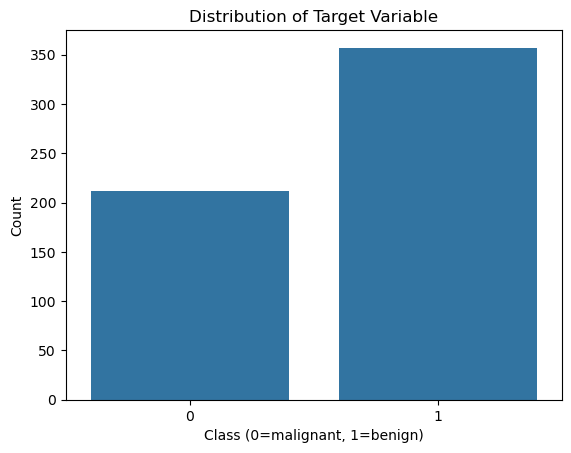

In [9]:
print("\nTarget distribution:")
print(y.value_counts())

sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.xlabel("Class (0=malignant, 1=benign)")
plt.ylabel("Count")
plt.show()


Interpretation:

The Breast Cancer dataset contains 569 samples with 30 numerical features each. The target variable shows whether a tumor is malignant (0) or benign (1). The dataset is slightly imbalanced with more benign cases than malignant ones.




In [ ]:
# Part 2: Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,       
    stratify = y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


Why is stratification important?

Stratification keeps the class distribution the same in both training and test sets. Stratification ensures that we don't accidently put mostly only one class into training and the rest in testing. This could potentially mess with model's learning and evaluation.

In [ ]:
# Part 2: Feature Scaling

scaler = StandardScaler()
scaler.fit (X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("Means of first 3 scaled features:\n", X_train_scaled_df.iloc[:, :3].mean())
print("\nStandard deviations of first 3 scaled features:\n", X_train_scaled_df.iloc[:, :3].std())


Means of first 3 scaled features:
 mean radius      -4.317426e-15
mean texture      2.246067e-15
mean perimeter   -7.383593e-16
dtype: float64

Standard deviations of first 3 scaled features:
 mean radius       1.001101
mean texture      1.001101
mean perimeter    1.001101
dtype: float64


Why only fit on training data?

We fit only on the training data because we want the test set to be viewed as unseen, real-world data. Using only training data ensures that the model doesn't gain any prior information from the test set. Thus, we can maintain the fairness of the evaluation process as it ensures that no data leakage occurs.

Accuracy Score: 0.9824561403508771


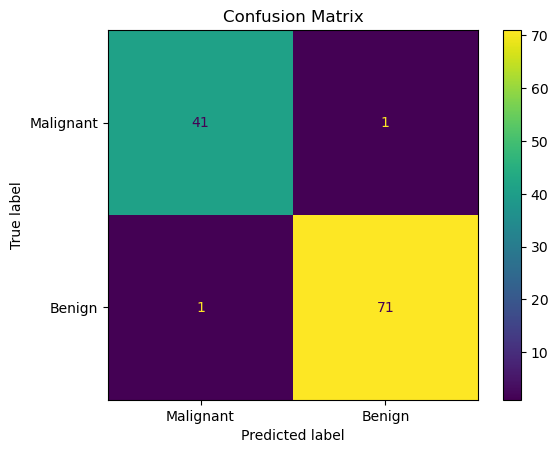

In [ ]:
# Part 3

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_predicted= log_reg.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy Score:", accuracy)

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, display_labels=["Malignant", "Benign"])
plt.title("Confusion Matrix")
plt.show()




In [16]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted))


Confusion Matrix:
 [[41  1]
 [ 1 71]]


In [17]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_predicted, target_names=["Malignant", "Benign"]))


Classification Report:
               precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Interpretation:

The logistic regression model achieved an accuracy of approximately 0.982, which means that the model correctly classified 98.2% of the tumors. 

1. The confusion matrix shows that the model correctly identified most benign and malignant cases correctly with only a small amount of misclassifications.
2. The precision score is very high which shows that the model is almost always correct.
3. Recall for malignant tumors shows how many actual malignant cases were caught by the model which is critical in medical diagnostics
4. The F1 score is 0.98 approx which is high enough to suggest that the model is performing well in both precision and recall - not just one of them.

Overall, the model performs well and is reliable, but depending on some false negatives, it might still need improvements in high-stakes real-world use.




In [ ]:
# Part 4


from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(solver='liblinear', random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores for each fold:")
print(cv_scores)

print("\nMean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())


Cross-Validation Accuracy Scores for each fold:
[0.98245614 0.97368421 0.97368421 0.97368421 0.99115044]

Mean CV Accuracy: 0.9789318428815402
Standard Deviation of CV Accuracy: 0.006990390328940835


Interpretation: (7e)

The mean CV accuracy provides a more reliable estimate of the model’s general performance than a single train-test split because this actually makes note of the variance in data distribution through testing across many folds. The mean accuracy from Part 3 is very close to the mean CV accuracy we got here, which shows the the model can generalise well. 

The Standard Deviation of the CV proves the stability of the model. The standard deviation here is very low (0.00699) which means that the model's performance is very consistent across various different subset of the data. 

In [25]:
pipeline.fit(X_train, y_train)
y_predicted_pipe = pipeline.predict(X_test)

accuracy_pipe = accuracy_score(y_test, y_predicted_pipe)
print("Pipeline Test Accuracy:", accuracy_pipe)


Pipeline Test Accuracy: 0.9824561403508771


Comparing Accuracy:
The pipeline based test accuracy is almost the exact same as the accuracy we obtaind in Part 3b. Thus, this confirms that the pipeline setup performs equally well while reducing the complexity of code to be written and the manual steps to be taken. 

Random Forest Pipeline Accuracy: 0.956140350877193

Confusion Matrix:
 [[39  3]
 [ 2 70]]


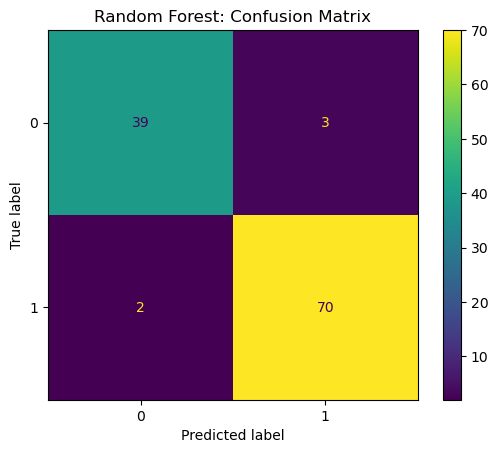


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Part 5

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Pipeline Accuracy:", accuracy_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)

# Visualize Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot()
plt.title("Random Forest: Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Part 6: Reflection 

If we compare the 2 models, the Random Forest pipeline achieved an accuracy of 0.956, while the Logistic Regression pipeline achieved 0.982 accuracy on the same test set. While both models performed reasonably well, the Logistic Regression pipeline achieved slightly better results in terms of overall accuracy.

If we analyse the specific metrics like precision from the classification reports, the Logistics Regression showed a 0.2 higher recall for the malignant class. I think even this small margin is critical in medical applications where failing to detect a malignant tumor can have extremely severe consequences. However, the Random Forest model had a higher f1 score and is thus more balanced in both precision and recall. 